Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33596452.89it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1312441.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9205392.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2247850.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



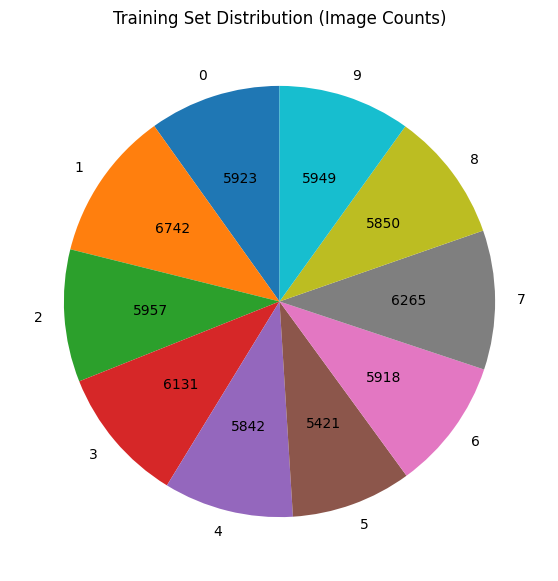

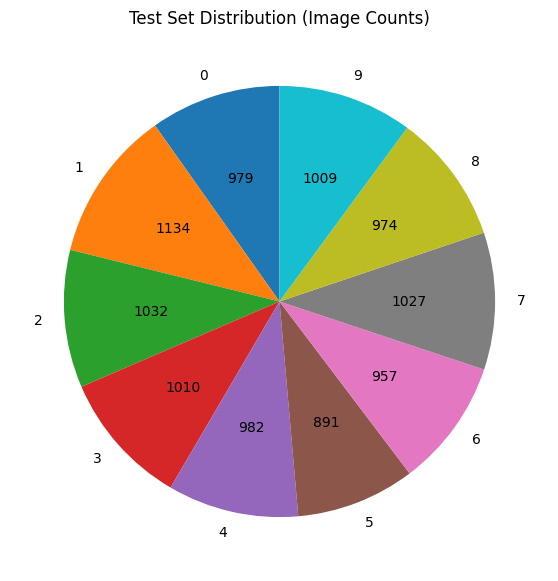

Displaying one image from each category (0-9):


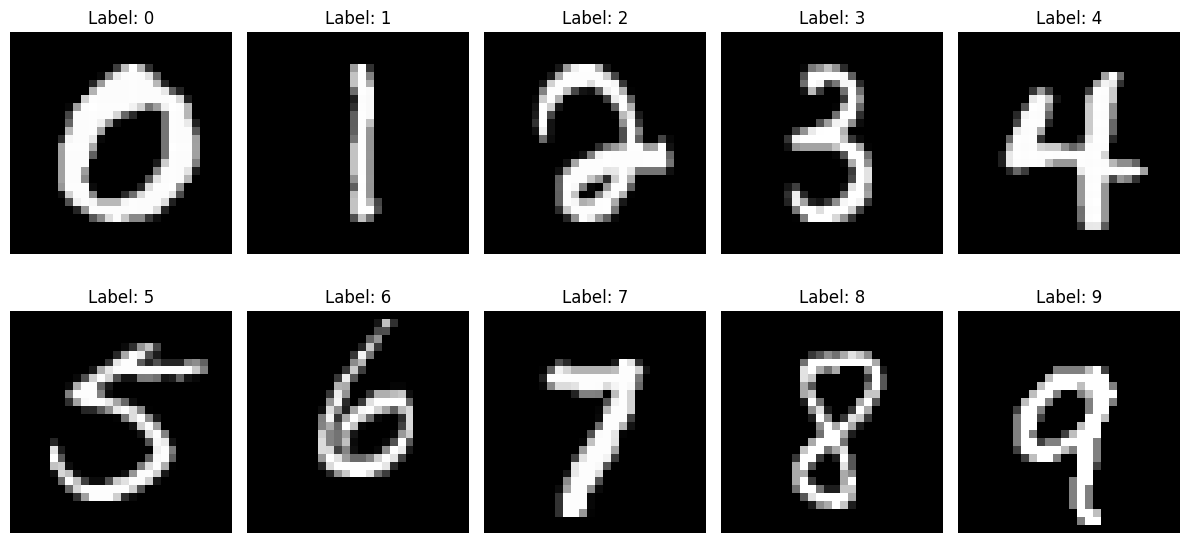

Accuracy for digit 0: 0.8878
Accuracy for digit 1: 0.9507
Accuracy for digit 2: 0.2578
Accuracy for digit 3: 0.3495
Accuracy for digit 4: 0.1711
Accuracy for digit 5: 0.0493
Accuracy for digit 6: 0.9342
Accuracy for digit 7: 0.2724
Accuracy for digit 8: 0.6653
Accuracy for digit 9: 0.9465
Overall Accuracy: 0.5558
Precision: 0.6917258486386416
Recall: 0.5558
F1 Score: 0.5170420327932064
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
Classification Report:
              precision    recall  f1-s

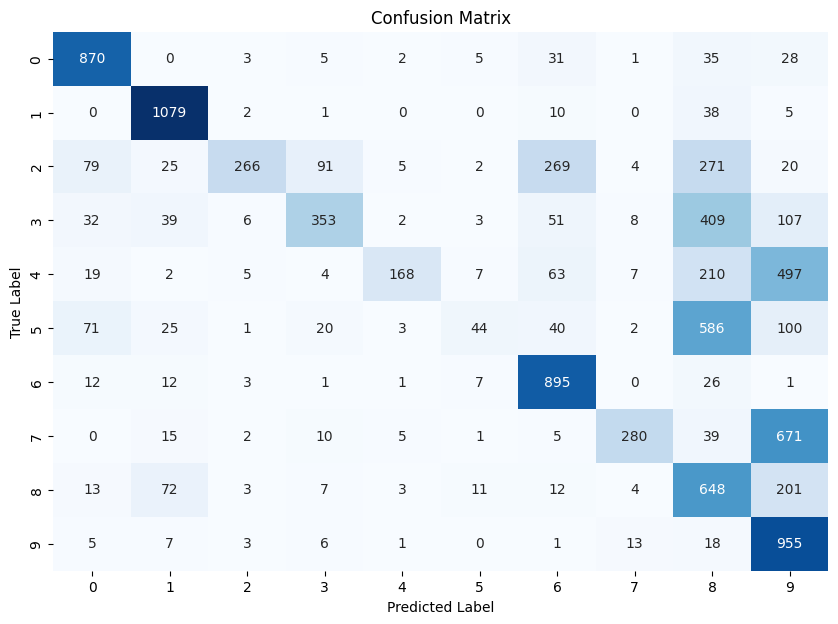

Some misclassified images:


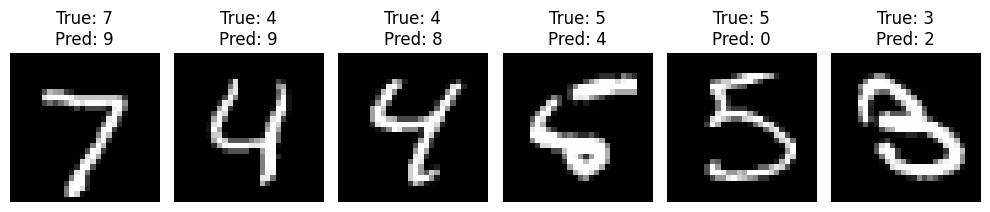

Accuracy for digit 0: 0.9592
Accuracy for digit 1: 0.9656
Accuracy for digit 2: 0.7907
Accuracy for digit 3: 0.8743
Accuracy for digit 4: 0.9043
Accuracy for digit 5: 0.8240
Accuracy for digit 6: 0.8946
Accuracy for digit 7: 0.8405
Accuracy for digit 8: 0.8111
Accuracy for digit 9: 0.8533
Overall Accuracy of LDA: 0.8730
Precision of LDA: 0.8743323035702135
Recall of LDA: 0.873
F1 Score of LDA: 0.8726781226679746
Confusion Matrix of LDA:
[[ 940    0    1    4    2   13    9    1    9    1]
 [   0 1096    4    3    2    2    3    0   25    0]
 [  15   32  816   34   21    5   37    9   57    6]
 [   5    5   25  883    4   25    3   16   29   15]
 [   0   12    6    0  888    4    7    2   10   53]
 [   8    8    4   44   12  735   15   10   38   18]
 [  12    8   11    0   25   29  857    0   16    0]
 [   2   30   15    9   22    2    0  864    4   80]
 [   7   27    8   27   20   53   10    6  790   26]
 [   9    7    1   13   63    6    0   37   12  861]]
Classification Report of LDA

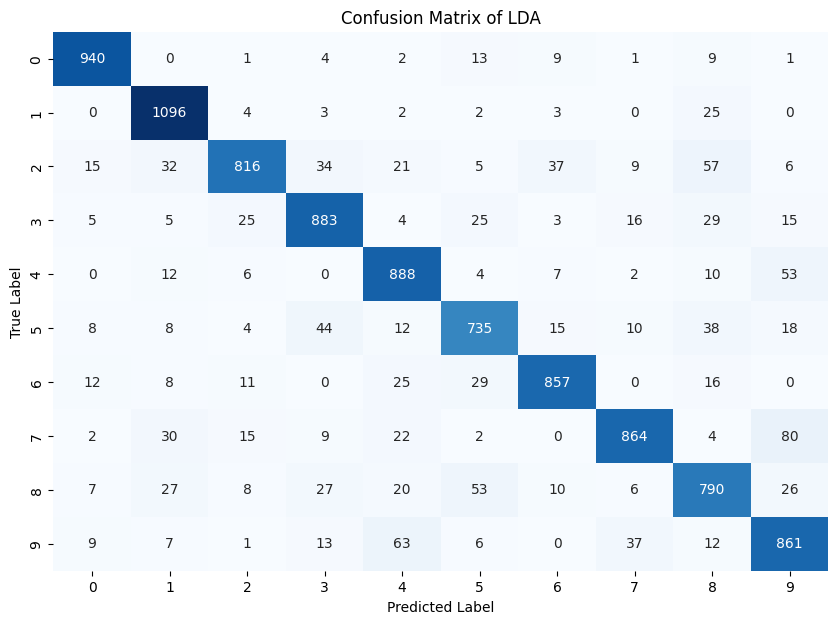

Some misclassified images:


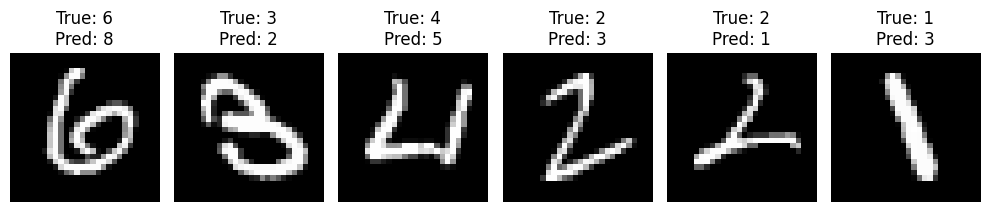

In [ ]:
!pip install torch torchvision matplotlib
import torch
from torchvision import datasets, transforms
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply transform to convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load train and test datasets
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Get the labels from the training set and test set
train_labels = trainset.targets
test_labels = testset.targets

# Count the number of occurrences of each label (0 to 9)
train_counts = Counter(train_labels.numpy())
test_counts = Counter(test_labels.numpy())

# Create a pandas DataFrame to store the counts
df = pd.DataFrame({
    'Digit': range(10),  # Digits 0 to 9
    'Train Count': [train_counts[i] for i in range(10)],
    'Test Count': [test_counts[i] for i in range(10)]})

# Function to display the actual count in the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(pct * total / 100.0)
        return f'{val:d}'  # Display the actual value
    return my_autopct

# Create separate pie chart for the training set
plt.figure(figsize=(7, 7))
plt.pie(df['Train Count'], labels=df['Digit'], autopct=make_autopct(df['Train Count']), startangle=90)
plt.title('Training Set Distribution (Image Counts)')
plt.show()

# Create separate pie chart for the test set
plt.figure(figsize=(7, 7))
plt.pie(df['Test Count'], labels=df['Digit'], autopct=make_autopct(df['Test Count']), startangle=90)
plt.title('Test Set Distribution (Image Counts)')
plt.show()

# Load the datasets into DataLoader for batching
train_loader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)

# Flatten the data (28x28 images to 784 features) Fetch all train and test data
train_data = next(iter(train_loader))
test_data = next(iter(test_loader))

X_train, y_train = train_data[0].view(-1, 28*28).numpy(), train_data[1].numpy()
X_test, y_test = test_data[0].view(-1, 28*28).numpy(), test_data[1].numpy()

# Function to display one image per category (0-9)
def show_images_by_category(images, labels):
    plt.figure(figsize=(12, 6))

    # We will store the first image of each category (0-9)
    categories = np.unique(labels)
    chosen_images = []
    chosen_labels = []

    # Loop through categories (0-9) and pick one image for each
    for category in categories:
        index = np.where(labels == category)[0][0]  # Get the first image of this category
        chosen_images.append(images[index])
        chosen_labels.append(labels[index])

    # Display each chosen image
    for i in range(len(categories)):
        plt.subplot(2, 5, i + 1)
        image = chosen_images[i].reshape(28, 28)  # Reshape back to 28x28
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {chosen_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show one image from each category (0-9) from the training set
print("Displaying one image from each category (0-9):")
show_images_by_category(X_train, y_train)

# Apply Gaussian Naive Bayes
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict using the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy for each digit
def digit_accuracy(y_test, y_pred, digit):
    # Get indices of the specific digit in the test set
    indices = np.where(y_test == digit)[0]
    # Calculate the accuracy only for the specific digit
    digit_acc = accuracy_score(y_test[indices], y_pred[indices])
    return digit_acc

# Print accuracy for each digit (0 to 9)
for digit in range(10):
    acc = digit_accuracy(y_test, y_pred, digit)
    print(f'Accuracy for digit {digit}: {acc:.4f}')

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics for the new dataset
print(f'Overall Accuracy: {accuracy:.4f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Function to visualize the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualize confusion matrix and classification report
plot_confusion_matrix(conf_matrix)

# Function to display misclassified images
def show_misclassified_images(images, true_labels, predicted_labels, num_images=6):
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i].reshape(28, 28)  # Reshape to original 28x28 form
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some misclassified images
misclassified_indices = np.where(y_test != y_pred)[0]

if len(misclassified_indices) > 0:
    print("Some misclassified images:")
    # 6 misclassified images to display
    show_misclassified_images(X_test[misclassified_indices], y_test[misclassified_indices], y_pred[misclassified_indices], num_images=min(6, len(misclassified_indices)))
else:
    print("No misclassified images.")



# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Predict using the test data
y_pred_lda = lda.predict(X_test)

# Calculate the accuracy for each digit
def digit_accuracy(y_test, y_pred_lda, digit):
    # Get indices of the specific digit in the test set
    indices = np.where(y_test == digit)[0]
    # Calculate the accuracy only for the specific digit
    digit_acc = accuracy_score(y_test[indices], y_pred_lda[indices])
    return digit_acc

# Print accuracy for each digit (0 to 9)
for digit in range(10):
    acc = digit_accuracy(y_test,y_pred_lda, digit)
    print(f'Accuracy for digit {digit}: {acc:.4f}')

# Calculate metrics
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
classification_rep_lda = classification_report(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
f1_lda = f1_score(y_test, y_pred_lda, average='weighted')

# Print metrics for the new dataset
print(f'Overall Accuracy of LDA: {accuracy_lda:.4f}')
print(f'Precision of LDA: {precision_lda}')
print(f'Recall of LDA: {recall_lda}')
print(f'F1 Score of LDA: {f1_lda}')
print(f'Confusion Matrix of LDA:\n{conf_matrix_lda}')
print(f'Classification Report of LDA:\n{classification_rep_lda}')

# Function to visualize the confusion matrix
def plot_confusion_matrix_LDA(conf_matrix_lda):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix of LDA')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualize confusion matrix and classification report
plot_confusion_matrix_LDA(conf_matrix_lda)

# Function to display misclassified images
def show_misclassified_images(images, true_labels, predicted_labels, num_images=6):
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i].reshape(28, 28)  # Reshape to original 28x28 form
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some misclassified images
misclassified_indices = np.where(y_test != y_pred_lda)[0]

if len(misclassified_indices) > 0:
    print("Some misclassified images:")
    # 6 misclassified images to display
    show_misclassified_images(X_test[misclassified_indices], y_test[misclassified_indices], y_pred_lda[misclassified_indices], num_images=min(6, len(misclassified_indices)))
else:
    print("No misclassified images.")

# Accuracy values for each digit for both models
accuracy_model_NB = [0.8878, 0.9507, 0.2578, 0.3495, 0.1711, 0.0493, 0.9342, 0.2724, 0.6653, 0.9465]
accuracy_model_LDA = [0.9592, 0.9656, 0.7907, 0.8743, 0.9043, 0.8240, 0.8946, 0.8405, 0.8111, 0.8533]

# Digit labels (0 to 9)
digits = np.arange(10)

# Bar chart settings
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Positions for the bars
index = np.arange(len(digits))

# Plotting the bars for both models
bar1 = ax.bar(index, accuracy_model_NB, bar_width, label='Model NB')
bar2 = ax.bar(index + bar_width, accuracy_model_LDA, bar_width, label='Model LDA')

# Adding labels, title, and ticks
ax.set_xlabel('Digits')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Digits (Model NB vs Model LDA)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(digits)
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()

# Accuracy values for each digit for both models
accuracy_model_1 = [0.8878, 0.9507, 0.2578, 0.3495, 0.1711, 0.0493, 0.9342, 0.2724, 0.6653, 0.9465]
accuracy_model_2 = [0.9592, 0.9656, 0.7907, 0.8743, 0.9043, 0.8240, 0.8946, 0.8405, 0.8111, 0.8533]

# Precision, Recall, F1-Score for each digit for both models
precision_model_1 = [0.79, 0.85, 0.90, 0.71, 0.88, 0.55, 0.65, 0.88, 0.28, 0.37]
precision_model_2 = [0.94, 0.89, 0.92, 0.87, 0.84, 0.84, 0.91, 0.91, 0.80, 0.81]

recall_model_1 = [0.89, 0.95, 0.26, 0.35, 0.17, 0.05, 0.93, 0.27, 0.67, 0.95]
recall_model_2 = [0.96, 0.97, 0.79, 0.87, 0.90, 0.82, 0.89, 0.84, 0.81, 0.85]

f1_model_1 = [0.84, 0.90, 0.40, 0.47, 0.29, 0.09, 0.77, 0.42, 0.40, 0.53]
f1_model_2 = [0.95, 0.93, 0.85, 0.87, 0.87, 0.83, 0.90, 0.88, 0.80, 0.83]

# Digit labels (0 to 9)
digits = np.arange(10)

# Bar chart settings
bar_width = 0.35

# Plot 1: Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, accuracy_model_1, bar_width, label='Model NB')
plt.bar(digits + bar_width, accuracy_model_2, bar_width, label='Model LDA')
plt.title('Accuracy Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Precision Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, precision_model_1, bar_width, label='Model NB')
plt.bar(digits + bar_width, precision_model_2, bar_width, label='Model NBA')
plt.title('Precision Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Recall Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, recall_model_1, bar_width, label='Model NB')
plt.bar(digits + bar_width, recall_model_2, bar_width, label='Model LDA')
plt.title('Recall Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Recall')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4: F1-Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, f1_model_1, bar_width, label='Model NB')
plt.bar(digits + bar_width, f1_model_2, bar_width, label='Model LDA')
plt.title('F1-Score Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('F1-Score')
plt.legend()
plt.tight_layout()
plt.show()

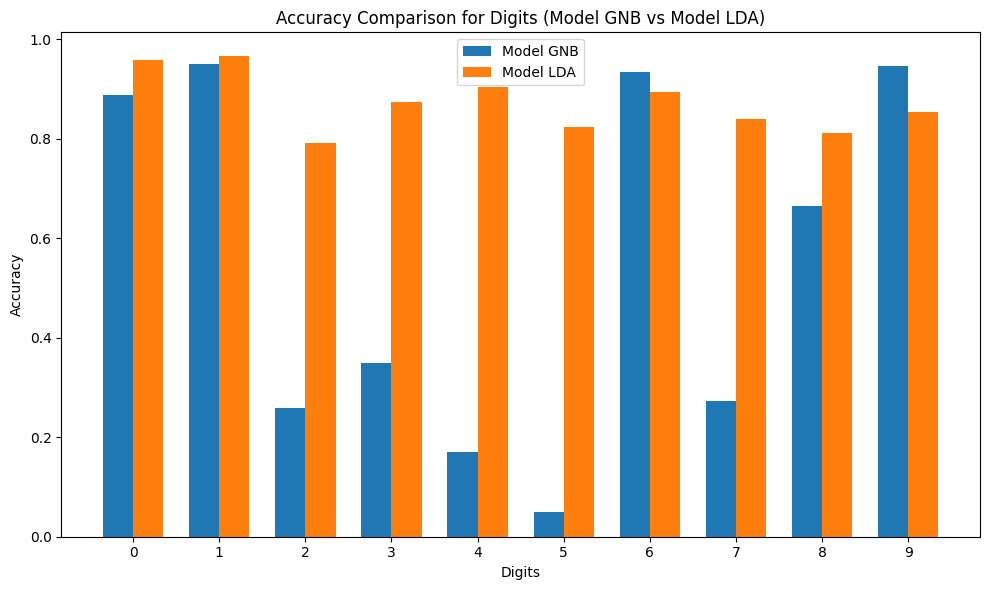

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for each digit for both models
accuracy_model_NB = [0.8878, 0.9507, 0.2578, 0.3495, 0.1711, 0.0493, 0.9342, 0.2724, 0.6653, 0.9465]
accuracy_model_LDA = [0.9592, 0.9656, 0.7907, 0.8743, 0.9043, 0.8240, 0.8946, 0.8405, 0.8111, 0.8533]

# Digit labels (0 to 9)
digits = np.arange(10)

# Bar chart settings
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Positions for the bars
index = np.arange(len(digits))

# Plotting the bars for both models
bar1 = ax.bar(index, accuracy_model_NB, bar_width, label='Model GNB')
bar2 = ax.bar(index + bar_width, accuracy_model_LDA, bar_width, label='Model LDA')

# Adding labels, title, and ticks
ax.set_xlabel('Digits')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Digits (Model GNB vs Model LDA)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(digits)
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


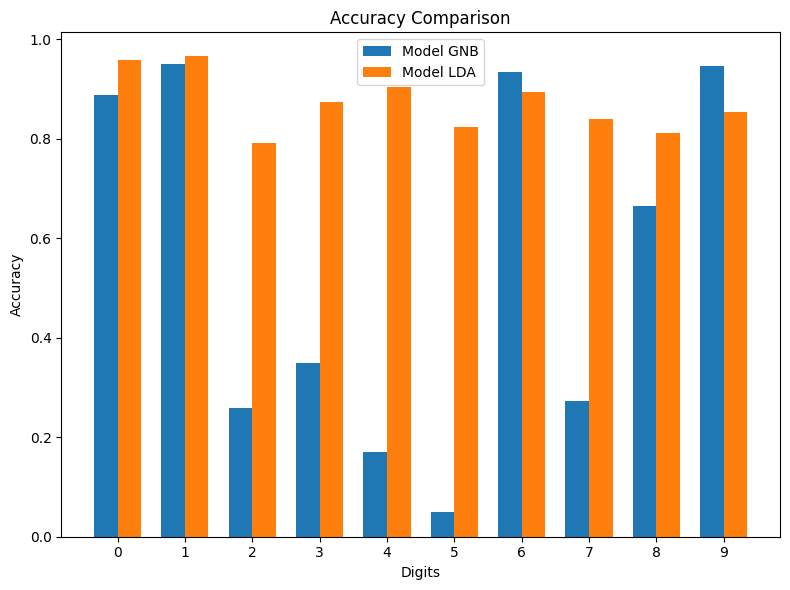

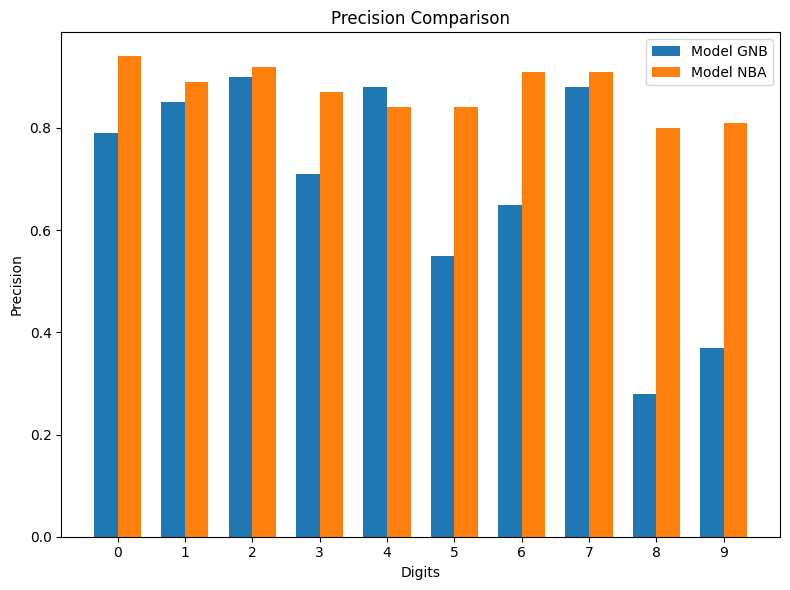

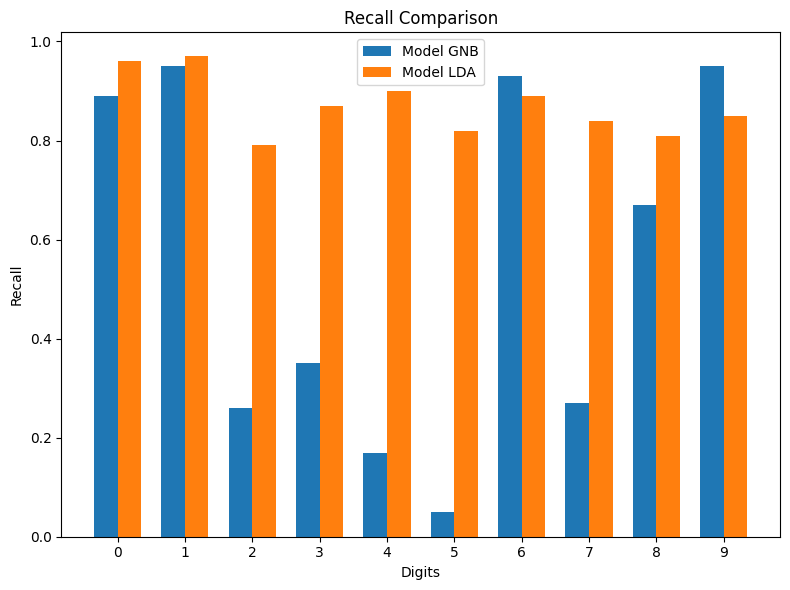

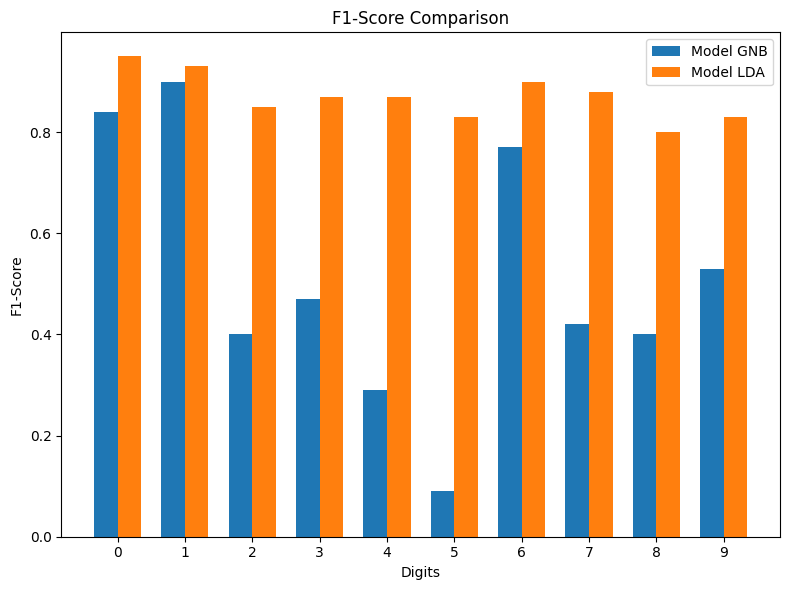

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for each digit for both models
accuracy_model_1 = [0.8878, 0.9507, 0.2578, 0.3495, 0.1711, 0.0493, 0.9342, 0.2724, 0.6653, 0.9465]
accuracy_model_2 = [0.9592, 0.9656, 0.7907, 0.8743, 0.9043, 0.8240, 0.8946, 0.8405, 0.8111, 0.8533]

# Precision, Recall, F1-Score for each digit for both models
precision_model_1 = [0.79, 0.85, 0.90, 0.71, 0.88, 0.55, 0.65, 0.88, 0.28, 0.37]
recall_model_1 = [0.89, 0.95, 0.26, 0.35, 0.17, 0.05, 0.93, 0.27, 0.67, 0.95]
f1_model_1 = [0.84, 0.90, 0.40, 0.47, 0.29, 0.09, 0.77, 0.42, 0.40, 0.53]

precision_model_2 = [0.94, 0.89, 0.92, 0.87, 0.84, 0.84, 0.91, 0.91, 0.80, 0.81]
recall_model_2 = [0.96, 0.97, 0.79, 0.87, 0.90, 0.82, 0.89, 0.84, 0.81, 0.85]
f1_model_2 = [0.95, 0.93, 0.85, 0.87, 0.87, 0.83, 0.90, 0.88, 0.80, 0.83]

# Digit labels (0 to 9)
digits = np.arange(10)

# Bar chart settings
bar_width = 0.35

# Plot 1: Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, accuracy_model_1, bar_width, label='Model GNB')
plt.bar(digits + bar_width, accuracy_model_2, bar_width, label='Model LDA')
plt.title('Accuracy Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Precision Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, precision_model_1, bar_width, label='Model GNB')
plt.bar(digits + bar_width, precision_model_2, bar_width, label='Model NBA')
plt.title('Precision Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Recall Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, recall_model_1, bar_width, label='Model GNB')
plt.bar(digits + bar_width, recall_model_2, bar_width, label='Model LDA')
plt.title('Recall Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('Recall')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4: F1-Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(digits, f1_model_1, bar_width, label='Model GNB')
plt.bar(digits + bar_width, f1_model_2, bar_width, label='Model LDA')
plt.title('F1-Score Comparison')
plt.xticks(digits + bar_width / 2, digits)
plt.xlabel('Digits')
plt.ylabel('F1-Score')
plt.legend()
plt.tight_layout()
plt.show()
